## Import Packages and Dataset

***Packages***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

***Dataset***

In [6]:
data = pd.read_csv("data/colonTumor.csv")
data_length = data.shape[1]
data_length

2001

In [7]:
column = []
for i in range(data_length):
    column.append("atribut"+str(i))

In [8]:
data = pd.read_csv("data/colonTumor.csv", header=None, names=column)
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,atribut2000
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [9]:
data = data.rename(columns={'atribut2000': 'status'})
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,negative
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,positive
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,negative
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,positive
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,negative


In [13]:
data.loc[data['status'] == 'negative', ['status']] = 0
data.loc[data['status'] == 'positive', ['status']] = 1
data.head()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125,0
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375,1
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625,0
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500,1
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250,0


In [19]:
data = data.apply(pd.to_numeric)

In [20]:
data['status'].value_counts()

0    40
1    22
Name: status, dtype: int64

## Data Analysis

**Perbandingan jumlah positive dan negative**

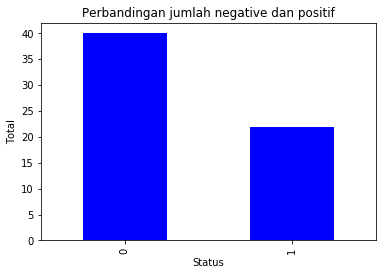

In [9]:
import matplotlib.pyplot as plt
data['status'].value_counts().plot(kind='bar', color="b")
plt.title("Perbandingan jumlah negative dan positif")
plt.xlabel('Status')
plt.ylabel('Total')
plt.show()

**statistic info**

In [10]:
data.describe()

,atribut0,atribut1,atribut2,atribut3,atribut4,atribut5,atribut6,atribut7,atribut8,atribut9,...,atribut1991,atribut1992,atribut1993,atribut1994,atribut1995,atribut1996,atribut1997,atribut1998,atribut1999,status
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7015.786710,4966.960015,4094.727879,3987.789284,2937.126113,4705.119302,3588.800323,2872.288631,4680.191160,4039.661953,...,100.227903,293.222722,124.653387,133.186935,184.136635,84.118387,114.930000,53.251230,42.965827,0.354839
std,3092.970584,2188.890480,1818.080939,2019.086903,1356.932887,2400.848112,1872.106095,1122.365448,2417.239217,2018.044248,...,78.022712,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175,0.482370
min,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815480,...,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250,0.000000
25%,4877.364700,3408.951150,2763.725900,2648.942875,1890.857125,2843.368775,2112.952150,2050.814025,2971.792775,2797.992525,...,48.409375,161.518125,69.121250,71.637500,85.905059,30.701875,53.881563,27.334375,24.610000,0.000000
50%,6274.612500,4738.280700,3890.338100,3451.498200,2666.075600,4416.617850,3438.180000,2844.960650,4088.735600,3823.017900,...,83.080625,251.883125,114.658125,104.271875,142.578570,56.385625,93.825625,45.358125,34.775000,0.000000
75%,8712.283175,6455.843200,5008.993750,4738.408950,3563.969325,6076.032125,4420.645350,3414.228475,6171.382800,4840.715500,...,117.208438,424.742500,177.730312,149.772188,212.019940,101.231250,145.074062,66.235312,54.697500,1.000000
max,14876.407000,10152.273000,8605.043800,11248.680000,8093.875000,11222.682000,9939.246200,5917.026300,14144.835000,12307.913000,...,438.383750,902.572500,333.418750,464.930000,702.130950,405.600000,390.890000,197.220000,126.826250,1.000000


## Features Target Split

In [11]:
X = data.drop(['status'],axis=1)
y = data['status']

### Train Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=45)

## Normalization

In [13]:
def minmax_scaler(X_train_, X_test_):
    scaler = MinMaxScaler()
    X_train_ = scaler.fit_transform(X_train_)
    X_test_ = scaler.transform(X_test_)
    return X_train_,X_test_

In [14]:
X_train_, X_test_ = minmax_scaler(X_train,X_test)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)
X_test = pd.DataFrame(data=X_test_, columns=X_test.columns)

### Reduksi Dimensi

In [57]:
lasso = Lasso(alpha=0.0001, max_iter=10e5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
coeff = pd.DataFrame({
    "coef" : lasso.coef_!=0
})
coeff_terpilih = np.sum(lasso.coef_!=0)
coeff_terpilih

50

In [39]:
fitur = coeff[coeff["coef"]==True].index.tolist()

In [40]:
X_trainLasso = X_train[["atribut"+str(i) for i in fitur]]
X_trainLasso.head()

,atribut10,atribut33,atribut111,atribut163,atribut275,atribut376,atribut505,atribut553,atribut579,atribut679,...,atribut1739,atribut1742,atribut1756,atribut1768,atribut1771,atribut1869,atribut1872,atribut1923,atribut1952,atribut1975
0,0.416045,0.655379,0.879045,0.555458,0.643175,0.716848,0.888800,1.000000,0.917433,1.000000,...,0.872625,1.000000,1.000000,1.000000,0.217617,0.671481,0.374126,0.532584,0.848732,0.065633
1,0.680524,0.393047,0.347335,0.147873,0.120901,0.415570,0.559937,0.213210,0.268630,0.158985,...,0.229530,0.124220,0.275099,0.181544,0.098289,0.054459,0.060303,0.586617,0.145635,0.057581
2,0.786710,0.427539,0.198608,0.420891,0.188010,0.197464,0.123901,0.363424,0.318826,0.588224,...,0.205541,0.526552,0.207439,0.201823,0.363305,0.466420,0.080944,0.097071,0.384770,0.278322
3,0.203140,0.334068,0.000000,0.159765,0.171007,0.188198,0.259914,0.212018,0.153335,0.565261,...,0.427931,0.091540,0.180508,0.171115,0.029959,0.195054,0.009671,0.106269,0.353706,0.099446
4,0.401509,0.317303,0.590016,0.176515,0.268050,0.491686,0.320408,0.439163,0.607262,0.380481,...,0.572487,0.159858,0.309284,0.334630,0.147754,0.159360,0.100278,0.676946,0.302463,0.078409


In [41]:
X_testLasso = X_test[["atribut"+str(i) for i in fitur]]
X_testLasso.head()

,atribut10,atribut33,atribut111,atribut163,atribut275,atribut376,atribut505,atribut553,atribut579,atribut679,...,atribut1739,atribut1742,atribut1756,atribut1768,atribut1771,atribut1869,atribut1872,atribut1923,atribut1952,atribut1975
0,0.181377,0.072004,0.112440,0.112606,0.092043,0.160933,0.104666,0.151306,0.496455,0.066020,...,0.180486,0.051649,0.077693,0.122963,0.126377,0.060474,0.085495,0.388548,0.129107,0.029964
1,0.566287,0.906831,0.521293,0.236093,0.166133,0.227746,0.033505,0.527497,0.449832,0.498179,...,0.620703,0.575264,0.162941,0.246550,0.574461,0.716643,0.112456,0.225260,0.690220,0.059667
2,-0.003422,0.473643,0.326076,0.271831,0.384657,1.120975,0.312219,0.551506,0.090596,0.587438,...,0.178953,0.673781,0.364714,0.448213,0.136171,0.139419,0.342616,0.108468,0.459073,0.130701
3,0.192889,0.262615,0.069581,0.173359,0.445433,0.027749,0.114542,0.282917,0.019270,0.195461,...,0.027660,0.585540,0.034555,0.071744,0.111761,0.428658,0.026042,0.049629,0.452323,0.243228
4,0.254088,0.338108,0.207351,0.314908,0.347958,0.811475,0.203259,0.408719,0.601119,0.639548,...,0.234633,0.414632,0.391324,0.616879,0.304432,-0.034337,0.197198,0.625187,0.583898,0.230596


## Cross Validation dan Hyperparameter Tuning

In [42]:
model_rfg = RandomForestClassifier()

### Random search optimization

In [43]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'log2'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }

### Tuning

In [44]:
random_search = RandomizedSearchCV(estimator=model_rfg,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8,
                                   n_jobs = -1)

# Fit the random search model
random_search.fit(X_trainLasso, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   55.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [45]:
print("Best Params : ",random_search.best_params_)
print()
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}

0.776 (+/-0.154) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.756 (+/-0.169) for {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.755 (+/-0.205) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}
0.816 (+/-0.103) for {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False}
0.798 (+/-0.201) for {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'bootstrap': True}
0.776 (+/-0.154) for {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}
0.755 (+/-0.205) for {'n_estimators': 400, 'min_samples_split': 2, 

### Grid Search

In [46]:
random_search.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'bootstrap': False}

In [47]:
grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto'],
               'min_samples_split': [10],
               'min_samples_leaf': [1],
               'bootstrap': [False]
                     }

In [48]:
grid_search = GridSearchCV(estimator=model_rfg,
                                   param_grid=grid_params,
                                   cv=3, 
                                   verbose=1, 
                                   n_jobs = -1)

grid_search.fit(X_trainLasso, y_train)
print("Best Params : ",grid_search.best_params_)
print()
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.8s finished


Best Params :  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}

0.795 (+/-0.158) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.837 (+/-0.054) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
0.816 (+/-0.103) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
0.816 (+/-0.103) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 800}
0.816 (+/-0.103) for {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}


## Classification

In [49]:
classifier = grid_search.best_estimator_

In [50]:
classifier.fit(X_trainLasso, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
prediksi = classifier.predict(X_testLasso)
prediksi

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [52]:
pd.DataFrame({
    "status" : y_test,
    "status predicted" : prediksi
})

,status,status predicted
5,1,0
27,0,0
59,1,1
40,0,0
41,1,0
52,0,0
25,0,0
19,1,1
26,0,0
18,0,0


In [53]:
accuracy_score(y_test,prediksi)

0.8461538461538461

In [54]:
print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.60      0.75         5

    accuracy                           0.85        13
   macro avg       0.90      0.80      0.82        13
weighted avg       0.88      0.85      0.84        13



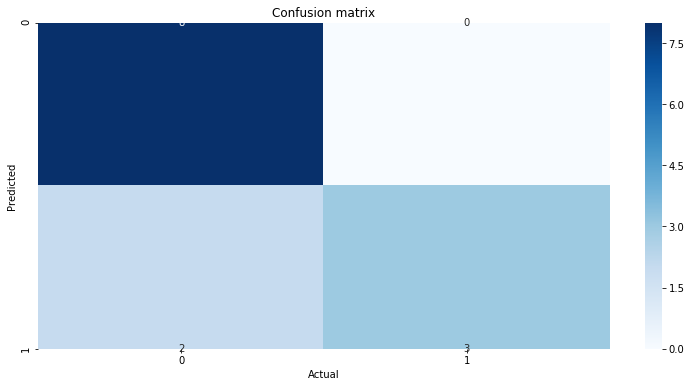

In [55]:
aux_df = data[['status']].drop_duplicates().sort_values('status')
conf_matrix = confusion_matrix(y_test, prediksi)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['status'].values, 
            yticklabels=aux_df['status'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [56]:
confusion_matrix(y_test,prediksi)

array([[8, 0],
       [2, 3]], dtype=int64)